In [ ]:
import pandas as pd
print("pandas works")

In [ ]:
df = pd.read_csv("data/IMDB Dataset.csv")
print(df.shape)

In [ ]:
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
df.head()

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

vader = SentimentIntensityAnalyzer()

def vader_compound(text):
    return vader.polarity_scores(text)["compound"]

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df["vader"] = df["review"].apply(vader_compound)
df["textblob"] = df["review"].apply(textblob_polarity)

In [ ]:
import pandas as pd

df = pd.read_csv("data/IMDB Dataset.csv")

print(df.shape)


In [ ]:
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
df.head()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
vader = SentimentIntensityAnalyzer()

def vader_compound(text):
    return vader.polarity_scores(text)["compound"]

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df["vader"] = df["review"].apply(vader_compound)
df["textblob"] = df["review"].apply(textblob_polarity)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
vader = SentimentIntensityAnalyzer()

def vader_compound(text):
    return vader.polarity_scores(text)["compound"]

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df["vader"] = df["review"].apply(vader_compound)
df["textblob"] = df["review"].apply(textblob_polarity)


In [ ]:
df[["vader","textblob","label"]].head()

In [ ]:
import numpy as np

X = df[["vader","textblob"]].values.astype(np.float32)
y = df["label"].values.astype(np.float32).reshape(-1,1)

print("X shape:", X.shape)
print("y shape:", y.shape)

In [ ]:
np.random.seed(42)

indices = np.arange(len(X))
np.random.shuffle(indices)

split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]

print(X_train.shape, X_test.shape)


In [ ]:
import sys
sys.path.append("src")

In [ ]:
from mlp import MLP

In [ ]:
model = MLP(input_size=2, hidden_size=8, lr=0.5)

In [ ]:
model.train(X_train, y_train, epochs=50)

In [ ]:
pred = model.predict(X_test)

accuracy = (pred == y_test).mean()
print("Test Accuracy:", accuracy)

In [ ]:
import numpy as np

np.savez(
    "model/mlp_weights.npz",
    W1=model.W1,
    b1=model.b1,
    W2=model.W2,
    b2=model.b2
)

print("Model saved!")

In [ ]:
import pickle
import os

os.makedirs("model", exist_ok=True)

with open("model/best_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Saved: model/best_model.pkl")

In [ ]:
import pickle
import os

os.makedirs("model", exist_ok=True)

with open("model/best_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Saved: model/best_model.pkl")

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/IMDB Dataset.csv")
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})

print(df.shape)
df.head()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/IMDB Dataset.csv")
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})

print(df.shape)
df.head()

In [1]:
import os, sys, random
import numpy as np
import pandas as pd

# Make results reproducible
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print("Working directory:", os.getcwd())


Working directory: /Users/aminejb/Sentiment-MLP/notebooks


In [2]:
DATA_PATH = os.path.join("..", "data", "IMDB Dataset.csv")
df = pd.read_csv(DATA_PATH)

df["label"] = df["sentiment"].map({"positive": 1, "negative": 0}).astype(int)

print(df.shape)
df.head()


(50000, 3)


,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [3]:
df.columns

Index(['review', 'sentiment', 'label'], dtype='str')

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

vader = SentimentIntensityAnalyzer()

def vader_compound(text):
    return vader.polarity_scores(text)["compound"]

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df["vader"] = df["review"].apply(vader_compound)
df["textblob"] = df["review"].apply(textblob_polarity)

df[["vader","textblob","label"]].head(10)


,vader,textblob,label
0,-0.9916,0.023433,1
1,0.9670,0.109722,1
2,0.9519,0.354008,1
3,-0.9213,-0.057813,0
4,0.9744,0.217952,1
5,0.9828,0.155294,1
6,0.9022,0.285522,1
7,0.8730,0.082716,0
8,0.2362,-0.142863,0
9,0.9507,0.415000,1


In [5]:
import numpy as np
SEED = 42
np.random.seed(SEED)

X = df[["vader","textblob"]].values.astype(np.float32)
y = df["label"].values.astype(np.float32).reshape(-1,1)

idx = np.arange(len(X))
np.random.shuffle(idx)

split = int(0.8 * len(X))
train_idx, test_idx = idx[:split], idx[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (40000, 2) (40000, 1)
Test : (10000, 2) (10000, 1)


In [6]:
import os, sys
sys.path.append(os.path.join("..", "src"))  # because notebook is in notebooks/

from mlp import MLP

model = MLP(input_size=2, hidden_size=8, lr=0.5)
losses = model.train(X_train, y_train, epochs=50)

pred = model.predict(X_test)
accuracy = float((pred == y_test).mean())
print("Test Accuracy:", accuracy)


Epoch 0, Loss: 0.7002
Epoch 5, Loss: 0.6904
Epoch 10, Loss: 0.6800
Epoch 15, Loss: 0.6629
Epoch 20, Loss: 0.6372
Epoch 25, Loss: 0.6099
Epoch 30, Loss: 0.5902
Epoch 35, Loss: 0.5794
Epoch 40, Loss: 0.5738
Epoch 45, Loss: 0.5706
Test Accuracy: 0.7082


Matplotlib is building the font cache; this may take a moment.


ValueError: x, y, and format string must not be None

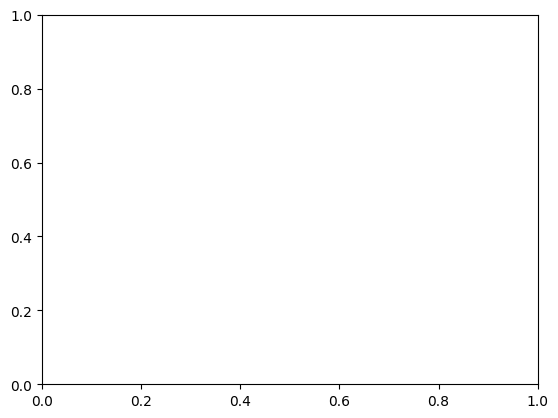

In [7]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# make sure folders exist at project root
os.makedirs(os.path.join("..", "results"), exist_ok=True)
os.makedirs(os.path.join("..", "model"), exist_ok=True)

# Save model
with open(os.path.join("..", "model", "best_model.pkl"), "wb") as f:
    pickle.dump(model, f)

# metrics.txt
with open(os.path.join("..", "results", "metrics.txt"), "w") as f:
    f.write(f"Test Accuracy: {accuracy:.4f}\n")

# Confusion matrix
tp = int(((pred == 1) & (y_test == 1)).sum())
tn = int(((pred == 0) & (y_test == 0)).sum())
fp = int(((pred == 1) & (y_test == 0)).sum())
fn = int(((pred == 0) & (y_test == 1)).sum())

cm = np.array([[tn, fp],
               [fn, tp]])

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["Pred 0", "Pred 1"])
plt.yticks([0, 1], ["True 0", "True 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(os.path.join("..", "results", "confusion_matrix.png"), dpi=200)
plt.close()

# Loss curve
plt.figure()
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.tight_layout()
plt.savefig(os.path.join("..", "results", "loss_curves.png"), dpi=200)
plt.close()

# results_discussion.txt
discussion = f"""Results Discussion

Features:
- VADER compound polarity
- TextBlob polarity

Model:
- MLP from scratch (forward pass, BCE loss, backprop, gradient descent)
- Input: 2 features
- Hidden: 8 tanh
- Output: sigmoid

Performance:
- Test Accuracy: {accuracy:.4f}

Notes:
Accuracy is limited because the model only sees 2 sentiment scores, not full text.
Errors occur with sarcasm, mixed sentiment, and lexicon disagreement.
Loss decreases across epochs, showing learning is working.
"""
with open(os.path.join("..", "results", "results_discussion.txt"), "w") as f:
    f.write(discussion)

# submission.csv
sub = pd.DataFrame({"id": np.arange(len(X_test)), "prediction": pred.flatten()})
sub.to_csv(os.path.join("..", "submission.csv"), index=False)

print("Saved everything to model/, results/, submission.csv")


In [1]:
import os, sys
sys.path.append(os.path.join("..", "src"))

from mlp import MLP

model = MLP(input_size=2, hidden_size=8, lr=0.5)
losses = model.train(X_train, y_train, epochs=50)

print(type(losses), len(losses), losses[:3])


IndentationError: unindent does not match any outer indentation level (mlp.py, line 49)

In [1]:
import os, sys
sys.path.append(os.path.join("..","src"))

from mlp import MLP
print("MLP imported successfully")


MLP imported successfully


In [2]:
model = MLP(input_size=2, hidden_size=8, lr=0.5)
losses = model.train(X_train, y_train, epochs=50)

print(type(losses), len(losses), losses[:3])


NameError: name 'X_train' is not defined

In [3]:
import os
import pandas as pd
import numpy as np

DATA_PATH = os.path.join("..", "data", "IMDB Dataset.csv")
df = pd.read_csv(DATA_PATH)

df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
print(df.shape)


(50000, 3)


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

vader = SentimentIntensityAnalyzer()

def vader_compound(text):
    return vader.polarity_scores(text)["compound"]

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

df["vader"] = df["review"].apply(vader_compound)
df["textblob"] = df["review"].apply(textblob_polarity)

df[["vader","textblob","label"]].head()


,vader,textblob,label
0,-0.9916,0.023433,1
1,0.9670,0.109722,1
2,0.9519,0.354008,1
3,-0.9213,-0.057813,0
4,0.9744,0.217952,1


In [5]:
X = df[["vader","textblob"]].values.astype(np.float32)
y = df["label"].values.astype(np.float32).reshape(-1,1)

print(X.shape, y.shape)


(50000, 2) (50000, 1)


In [6]:
np.random.seed(42)

idx = np.arange(len(X))
np.random.shuffle(idx)

split = int(0.8 * len(X))

train_idx = idx[:split]
test_idx = idx[split:]

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

print(X_train.shape, X_test.shape)


(40000, 2) (10000, 2)


In [7]:
import os, sys
sys.path.append(os.path.join("..","src"))

from mlp import MLP

model = MLP(input_size=2, hidden_size=8, lr=0.5)
losses = model.train(X_train, y_train, epochs=50)

print(type(losses), len(losses), losses[:3])


Epoch 0, Loss: 0.7002
Epoch 5, Loss: 0.6904
Epoch 10, Loss: 0.6800
Epoch 15, Loss: 0.6629
Epoch 20, Loss: 0.6372
Epoch 25, Loss: 0.6099
Epoch 30, Loss: 0.5902
Epoch 35, Loss: 0.5794
Epoch 40, Loss: 0.5738
Epoch 45, Loss: 0.5706
<class 'list'> 50 [0.7002280659011854, 0.6978780201395287, 0.6958071897292355]


In [8]:
pred = model.predict(X_test)
accuracy = float((pred == y_test).mean())
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7082


In [9]:
import os
os.makedirs(os.path.join("..", "results"), exist_ok=True)
os.makedirs(os.path.join("..", "model"), exist_ok=True)


In [10]:
import pickle
with open(os.path.join("..", "model", "best_model.pkl"), "wb") as f:
    pickle.dump(model, f)
print("Saved: model/best_model.pkl")


Saved: model/best_model.pkl


In [11]:
with open(os.path.join("..", "results", "metrics.txt"), "w") as f:
    f.write(f"Test Accuracy: {accuracy:.4f}\n")
print("Saved: results/metrics.txt")


Saved: results/metrics.txt


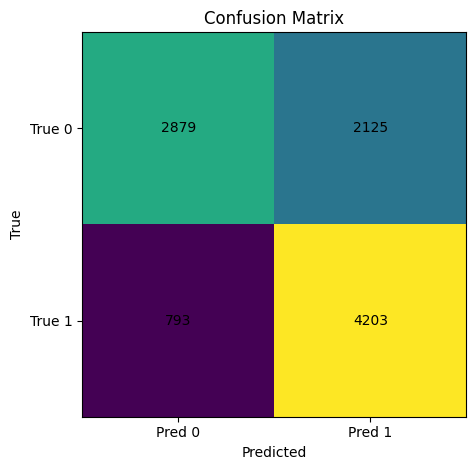

Saved: results/confusion_matrix.png


In [12]:
import numpy as np
import matplotlib.pyplot as plt

tp = int(((pred == 1) & (y_test == 1)).sum())
tn = int(((pred == 0) & (y_test == 0)).sum())
fp = int(((pred == 1) & (y_test == 0)).sum())
fn = int(((pred == 0) & (y_test == 1)).sum())

cm = np.array([[tn, fp],
               [fn, tp]])

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["Pred 0", "Pred 1"])
plt.yticks([0, 1], ["True 0", "True 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(os.path.join("..", "results", "confusion_matrix.png"), dpi=200)
plt.show()

print("Saved: results/confusion_matrix.png")


In [13]:
discussion = f"""Results Discussion

Features:
- VADER compound polarity
- TextBlob polarity

Model:
- MLP from scratch (forward pass, BCE loss, backprop, gradient descent)
- Input: 2 features
- Hidden: 8 tanh
- Output: sigmoid

Performance:
- Test Accuracy: {accuracy:.4f}

Notes:
Accuracy is limited because the model only sees 2 sentiment scores rather than the full text.
Errors occur with sarcasm, mixed sentiment, and lexicon disagreement.
Loss decreases across epochs, indicating correct gradient-based learning.
"""
with open(os.path.join("..", "results", "results_discussion.txt"), "w") as f:
    f.write(discussion)

print("Saved: results/results_discussion.txt")


Saved: results/results_discussion.txt


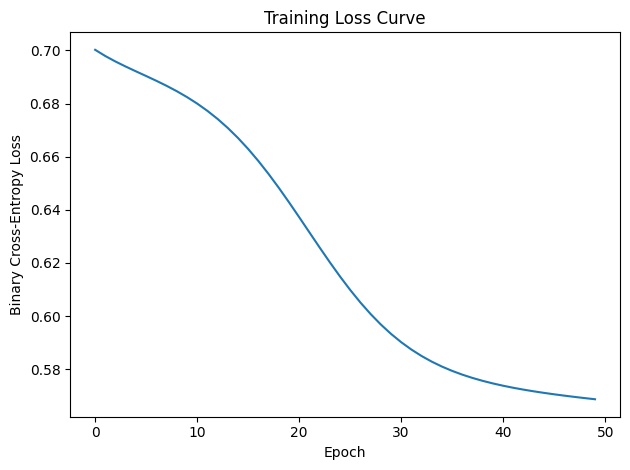

Saved: results/loss_curves.png


In [14]:
plt.figure()
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.tight_layout()
plt.savefig(os.path.join("..", "results", "loss_curves.png"), dpi=200)
plt.show()

print("Saved: results/loss_curves.png")


In [15]:
import pandas as pd

submission = pd.DataFrame({
    "id": np.arange(len(X_test)),
    "prediction": pred.flatten()
})
submission.to_csv(os.path.join("..", "submission.csv"), index=False)

print("Saved: submission.csv")


Saved: submission.csv


In [16]:
pred = model.predict(X_test)
accuracy = float((pred == y_test).mean())

print("Test Accuracy:", accuracy)


Test Accuracy: 0.7082
